In [40]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [41]:
for i in range(8):
    if i==0:
        train = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/DEV_'+str(i+1)+'.csv.csv')
        train=pd.concat([train,temp])

In [42]:
train

,suma,distancias,entropias,mutual_info,m_earth,max_info_p,antonimos,relaciones,sim_faltantes,CLASS
0,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,YES
1,0.000000,877.07654,0.000,0.003572,5.346563,0.000000,0,5,0.000000,NO
2,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,2,1.000000,UNKNOWN
3,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,YES
4,-0.140882,796.06140,1.530,0.087710,0.978448,0.231184,0,0,0.037146,YES
...,...,...,...,...,...,...,...,...,...,...
95,-0.019967,759.53076,2.055,0.181114,0.616965,0.424818,0,0,0.258356,UNKNOWN
96,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,YES
97,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,UNKNOWN
98,0.000000,0.00000,0.000,0.000000,0.000000,0.000000,0,0,1.000000,NO


<Axes: title={'center': 'mutual_info'}, xlabel='CLASS'>

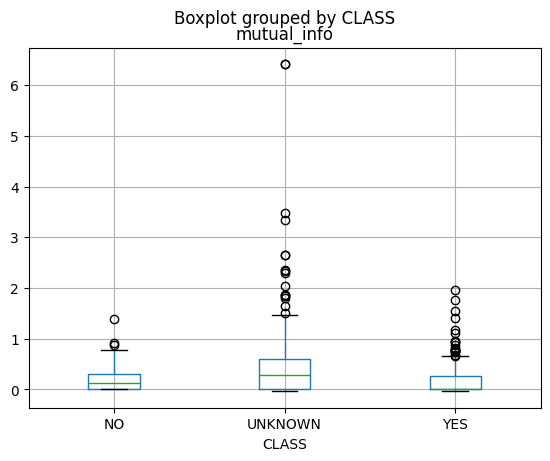

In [43]:
train.boxplot(by="CLASS",column=["mutual_info"])

In [44]:
train=train.drop(["suma","entropias","antonimos"],axis=1)
train

,distancias,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes,CLASS
0,0.00000,0.000000,0.000000,0.000000,0,1.000000,YES
1,877.07654,0.003572,5.346563,0.000000,5,0.000000,NO
2,0.00000,0.000000,0.000000,0.000000,2,1.000000,UNKNOWN
3,0.00000,0.000000,0.000000,0.000000,0,1.000000,YES
4,796.06140,0.087710,0.978448,0.231184,0,0.037146,YES
...,...,...,...,...,...,...,...
95,759.53076,0.181114,0.616965,0.424818,0,0.258356,UNKNOWN
96,0.00000,0.000000,0.000000,0.000000,0,1.000000,YES
97,0.00000,0.000000,0.000000,0.000000,0,1.000000,UNKNOWN
98,0.00000,0.000000,0.000000,0.000000,0,1.000000,NO


In [45]:
X = np.array(train.drop(['CLASS'],axis=1))
y_ = np.array(train['CLASS'])

In [46]:
# RTE3
y_train=[]
for i in y_:
    if i == "YES":
        y_train.append(1)
    else:
        y_train.append(0)

In [47]:
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

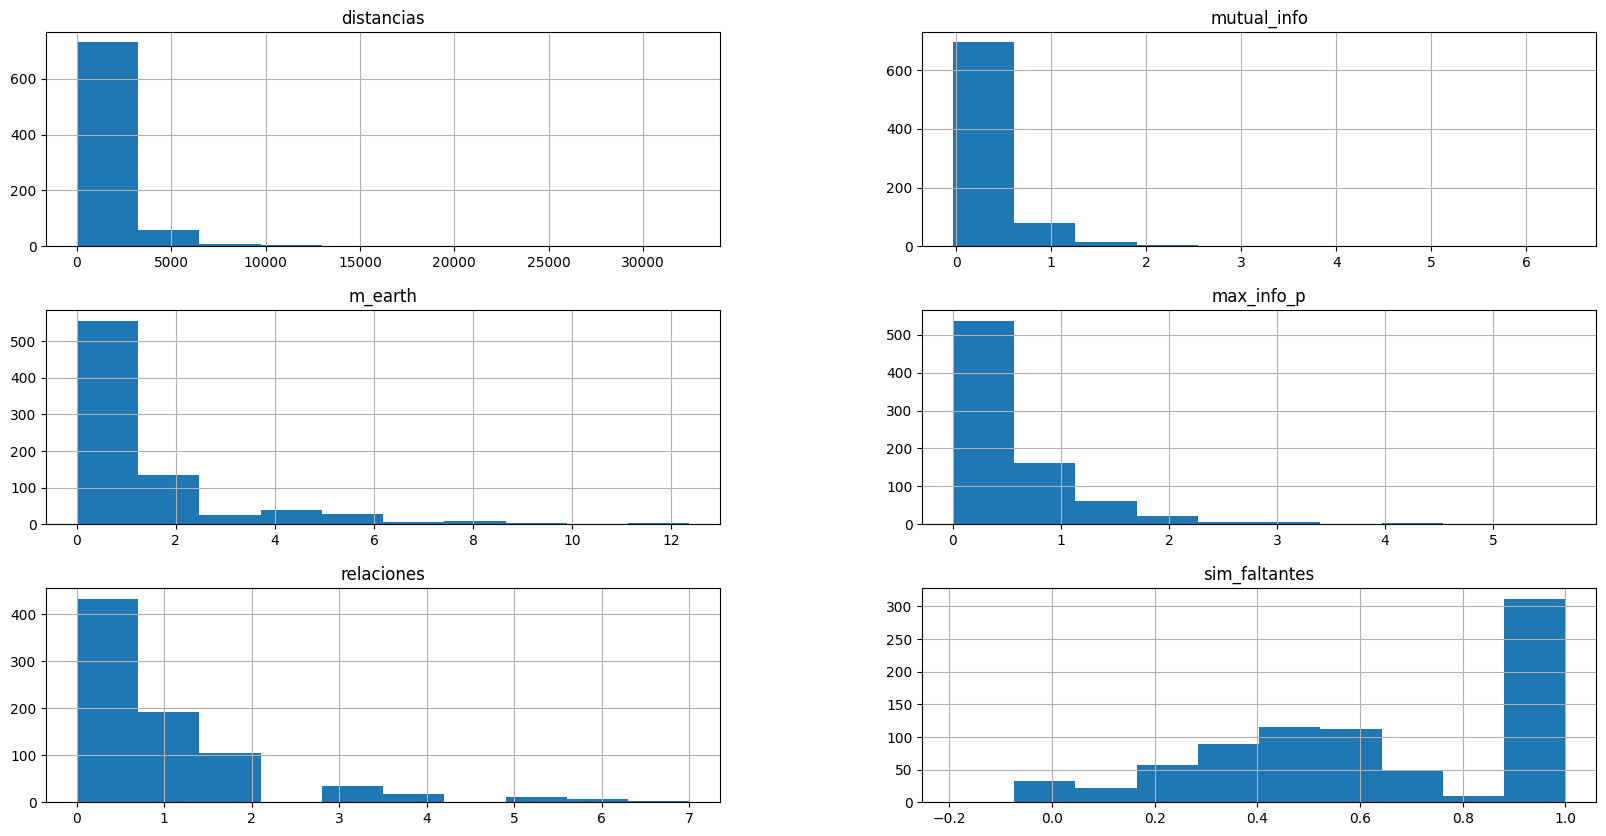

In [48]:
train.hist(figsize=(20,10))
plt.show()

In [49]:
for i in range(8):
    if i==0:
        test = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
    else:
        temp = pd.read_csv('salida/resultados/RTE3/TEST_'+str(i+1)+'.csv.csv')
        test=pd.concat([test,temp])

In [50]:
test=test.drop(["suma","entropias","antonimos"],axis=1)
test

,distancias,mutual_info,m_earth,max_info_p,relaciones,sim_faltantes,CLASS
0,2268.1458,1.563063e-01,6.176232,0.271529,3,0.105568,YES
1,1441.6440,1.681337e-01,0.701502,0.393066,0,0.338005,YES
2,536.2693,2.562741e-15,4.289287,0.000000,0,0.000000,YES
3,0.0000,0.000000e+00,0.000000,0.000000,0,1.000000,YES
4,863.1677,1.368563e-01,0.973838,0.412710,0,0.413161,NO
...,...,...,...,...,...,...,...
95,0.0000,0.000000e+00,0.000000,0.000000,1,1.000000,YES
96,0.0000,0.000000e+00,0.000000,0.000000,0,1.000000,NO
97,1257.3066,2.335746e-01,0.589826,0.467463,0,0.485553,UNKNOWN
98,632.9640,1.062411e-01,1.010164,0.353093,0,0.234342,UNKNOWN


In [51]:
X_t = np.array(test.drop(['CLASS'],axis=1))
y_t = np.array(test['CLASS'])

In [52]:
# RTE3
y_test=[]
for i in y_t:
    if i == "YES":
        y_test.append(1)
    else:
        y_test.append(0)

In [53]:
scaler = preprocessing.StandardScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [54]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [55]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [56]:
model = linear_model.LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [57]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [58]:
model.decision_function(X)

array([ 9.72054446e-01, -8.12578369e-01,  4.19888201e-01,  9.72054446e-01,
        4.53942699e-02,  6.95971324e-01,  9.72054446e-01,  6.95971324e-01,
        9.02374310e-02, -9.56696137e-01,  6.95971324e-01,  9.72054446e-01,
        2.31695724e-01,  2.37419102e-01,  5.90008627e-01,  9.72054446e-01,
        4.19888201e-01,  1.68024336e-01,  1.06581750e-01,  1.25401128e-01,
       -2.35316819e-01,  6.95971324e-01,  6.95971324e-01,  6.95971324e-01,
       -1.18163635e-01,  4.19888201e-01,  6.95971324e-01,  4.98232477e-02,
       -6.82320187e-02,  8.06949757e-03,  9.01985170e-02,  4.19888201e-01,
        2.04606464e-01,  6.58132275e-02,  6.95971324e-01,  6.95971324e-01,
        4.19888201e-01,  1.22368945e-01,  1.43438654e-01,  9.72054446e-01,
        9.72054446e-01,  2.03497260e-01, -2.81546389e-01,  4.28952511e-01,
        4.19888201e-01,  4.19888201e-01,  6.95971324e-01,  4.19888201e-01,
        9.72054446e-01,  6.95971324e-01, -4.94202911e-01, -1.29793674e-01,
       -5.34919454e-01,  

In [59]:
labels=train.columns[:-1]
labels

Index(['distancias', 'mutual_info', 'm_earth', 'max_info_p', 'relaciones',
       'sim_faltantes'],
      dtype='object')

In [60]:
model.classes_

array([0, 1])

In [61]:
model.coef_[0]

array([-0.26093586, -0.19895942,  0.16078133, -0.38972256, -0.34121685,
        0.24736294])

In [62]:
coeficientes=model.coef_[0]

In [63]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  5 sim_faltantes 3 max_info_p


In [64]:
n_columns=train.shape[1]-1

In [65]:
n_columns

6

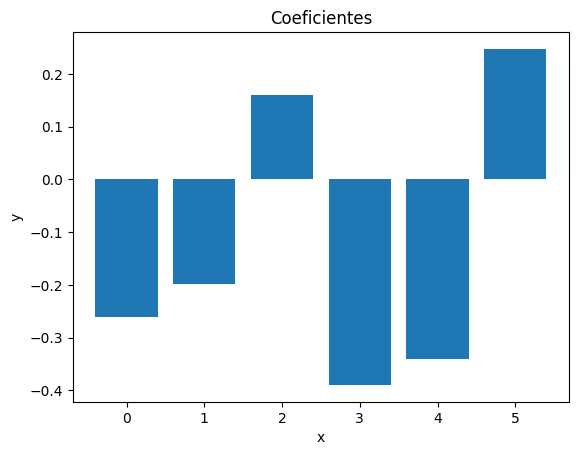

In [66]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [67]:
predictions = model.predict(X_test)

In [68]:
print(confusion_matrix(y_test, predictions))

[[210 180]
 [149 261]]


In [69]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.59
precision:  0.59
recall 0.64
f1_score:  0.61
matthews_score:  0.18


In [70]:
X_train.shape

(800, 6)

In [71]:
X_test.shape

(800, 6)

In [72]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [73]:
validation_size = 0.20
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [74]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.600000 (0.054537)


In [75]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.740000 (0.072529)


In [76]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.660000 (0.046515)


In [77]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.210000 (0.095587)
